<a href="https://colab.research.google.com/github/Antonio-Belo/MVP-ABBP/blob/main/MVP_ADBP_Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sprint I  - Análise de Dados e Boas Práticas**

>*Data Science & Analytics - PUC Rio*

>*Antonio Carlos Avallone Belo*

O objetivo desta análise é examinar uma miríade de factores e as suas complexas interligações com o objetivo de prever com precisão os resultados salariais. Este estudo procura fornecer informações valiosas sobre as actuais trajectórias salariais no domínio da ciência dos dados, estabelecendo simultaneamente uma base sólida para futuras explorações sobre o impacto de factores determinantes como o nível de experiência, o tipo de emprego, a dimensão da empresa e a localização geográfica nas estruturas salariais desta profissão em rápida evolução.

## **1. Definição do Problema**

O dataset usado neste projeto será o Pima Indians Diabetes, proveniente originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. Seu objetivo é prever se um paciente tem ou não diabetes, com base em certas medidas de diagnóstico médico. Este dataset é um subconjunto do dataset original e aqui, todos os pacientes são mulheres com pelo menos 21 anos de idade e de herança indígena Pima. O dataset apresenta em diversos atributos relacionados a dados médicos e uma variável de classe binária (0 ou 1). As variáveis ​​preditoras incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante. Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/uciml/pima-indians-diabetes-database




*   **work_year** [categorico]  -> Representa o ano específico em que o salário foi pago. Anos diferentes podem ter condições económicas diferentes que podem ter impacto no nível salarial.

*   **experience_level** [categórico] -> O nível de experiência que uma pessoa tem num determinado emprego. Trata-se de um fator determinante no cálculo do salário, dado que, normalmente, os indivíduos mais experientes recebem salários mais elevados devido às suas competências e conhecimentos avançados.

*   **employment_type** [categorico] -> A natureza do contrato de trabalho, como tempo inteiro, tempo parcial ou contrato, pode influenciar grandemente o salário. Os empregados a tempo inteiro têm frequentemente salários anuais mais elevados em comparação com os seus homólogos a tempo parcial ou contratuais.

*   **job_title [categórico]**: A função que um indivíduo desempenha numa empresa. As diferentes funções têm diferentes escalas salariais com base nas responsabilidades e competências exigidas. Por exemplo, as funções de gestão pagam normalmente mais do que as posições de nível de entrada.

*   **salário** [numérico] : O salário bruto total pago ao indivíduo. Este é diretamente influenciado por factores como o nível de experiência, o cargo e o tipo de emprego.

*  **salary_currency** [categorical] : A moeda específica em que o salário é pago, indicada por um código ISO 4217. As taxas de câmbio podem afetar o valor do salário quando convertido em diferentes moedas.

*   **salaryinusd** [numérico] : O montante total do salário bruto convertido em dólares americanos. Isto permite uma comparação uniforme dos salários em diferentes países e moedas.

*   **employee_residence** [categórico]: O país principal de residência do empregado, indicado por um código ISO 3166. O custo de vida e as taxas salariais prevalecentes no país de residência do empregado podem afetar os níveis salariais.

*   **remote_ratio** [rácio]: A proporção de trabalho efectuado remotamente. Com o aumento do trabalho remoto, as empresas podem ajustar os salários com base no custo de vida na localização do empregado e na proporção de trabalho remoto.

*   **company_location** [categorical]: A localização do escritório principal do empregador ou da sucursal que detém o contrato. As empresas em diferentes localizações podem oferecer diferentes tabelas salariais devido a diferentes condições económicas e custo de vida.

*  **company_size**  [categórico]: O número médio de trabalhadores da empresa durante o ano de trabalho. As empresas maiores têm frequentemente tabelas salariais estruturadas e podem oferecer salários mais elevados devido a economias de escala e a maiores fluxos de receitas.



  











In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


## **2. Carga de Dados**

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv sem cabeçalho disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.

In [98]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Antonio-Belo/MVP-ABBP/main/ds_salaries.csv"

# Dicionário com os novos nomes das colunas
new_columns = {
    'work_year'         : 'Ano',
    'experience_level'  : 'Nivel',
    'employment_type'   : 'Tipo_emp',
    'job_title'         : 'Função',
    'salary'            : 'Salario',
    'salary_currency'   : 'Moeda',
    'salary_in_usd'     : 'Salario(USD)',
    'employee_residence': 'Residencia',
    'remote_ratio'      : 'REmoto %',
    'company_location'  : 'Local',
    'company_size'      : 'Porte'
}
# Renomeando as colunas

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=new_columns, skiprows=1, delimiter=',')
dataset.rename(columns=new_columns, inplace=True)

In [99]:
dataset.head()

,Ano,Nivel,Tipo_emp,Função,Salario,Moeda,Salario(USD),Residencia,REmoto %,Local,Porte
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## **3. Análise de Dados**





### **3.1. Estatísticas Descritivas**

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [85]:
# Mostra as dimensões do dataset
print(dataset.shape)


(3755, 11)


In [86]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ano           3755 non-null   int64 
 1   Nivel         3755 non-null   object
 2   Tipo_emp      3755 non-null   object
 3   Função        3755 non-null   object
 4   Salario       3755 non-null   int64 
 5   Moeda         3755 non-null   object
 6   Salario(USD)  3755 non-null   int64 
 7   Residencia    3755 non-null   object
 8   REmoto %      3755 non-null   int64 
 9   Local         3755 non-null   object
 10  Porte         3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


In [87]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,Ano,Nivel,Tipo_emp,Função,Salario,Moeda,Salario(USD),Residencia,REmoto %,Local,Porte
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [88]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,Ano,Nivel,Tipo_emp,Função,Salario,Moeda,Salario(USD),Residencia,REmoto %,Local,Porte
3745,2021,SE,FT,Director of Data Science,168000,USD,168000,JP,0,JP,S
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
3748,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


É sempre importante verificar o tipo do atributos do dataset, pois pode ser necessário realizar conversões. Já fizemos anteriormente com o comando info, mas vamos ver uma outra forma de verificar a natureza de cada atributo e então exibir um resumo estatístico do dataset.

In [89]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes


Ano              int64
Nivel           object
Tipo_emp        object
Função          object
Salario          int64
Moeda           object
Salario(USD)     int64
Residencia      object
REmoto %         int64
Local           object
Porte           object
dtype: object

In [90]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,Ano,Salario,Salario(USD),REmoto %
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Vamos agora verificar se o dataset tem as classes balanceadas para que possamos tratar o desbalanceamento posteriormente, se necessário. Veremos que as classes 0 (não ocorrência de diabetes) e 1 (ocorrência de diabetes) estão desbalanceadas. Vamos guardar esta informação, pois possivelmente precisaremos realizar algum tipo de tratamento nas próximas etapas.

In [107]:
# distribuição do Porte da Empresa
print(dataset.groupby('Porte').size())

Porte
L     454
M    3153
S     148
dtype: int64


### **3.2. Visualizações Unimodais**

Vamos criar agora um histograma para cada atributo do dataset. Veremos que os atributos age, pedi e test seguem uma distribuição exponencial, e que as colunas mass e press seguem uma distribuição aproximadamente normal.

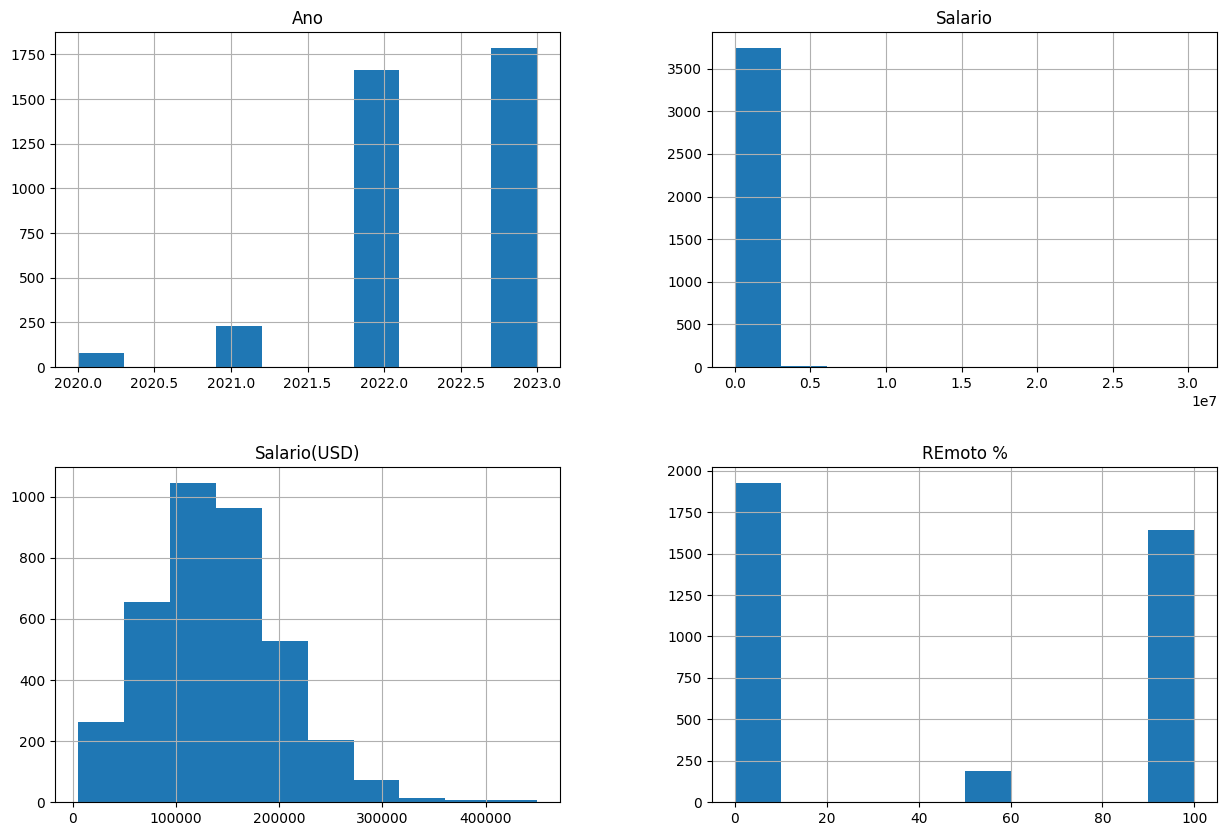

In [92]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.

Veremos que muitos dos atributos têm uma distribuição distorcida. Uma transformação como a Box-Cox, que pode aproximar a distribuição de uma Normal, pode ser útil neste caso.

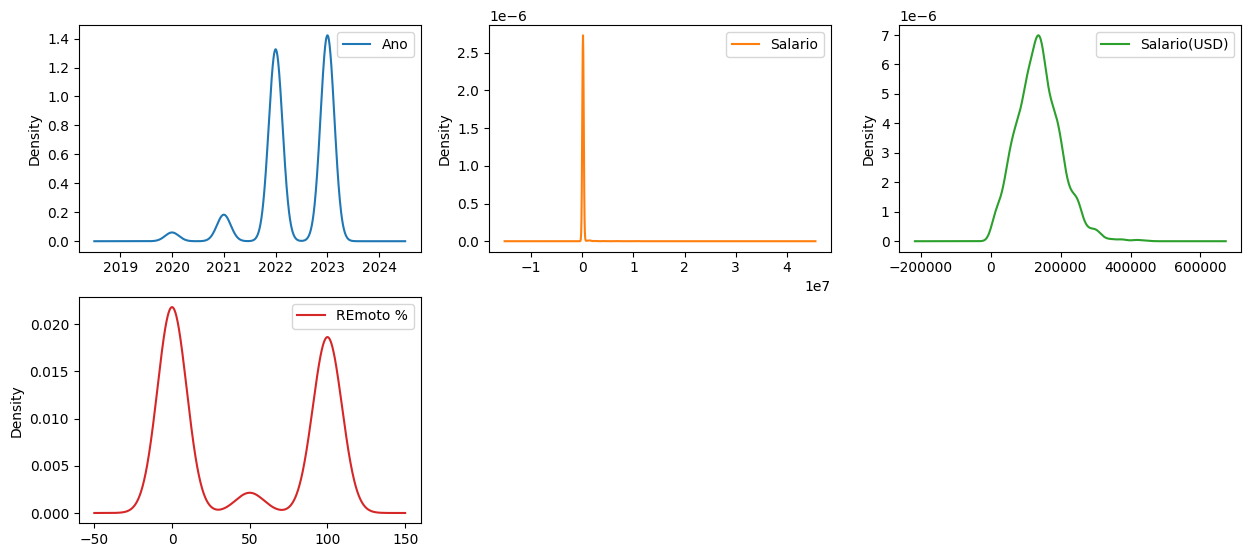

In [93]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()


Vamos agora trabalhar com boxplots. No boxblot, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

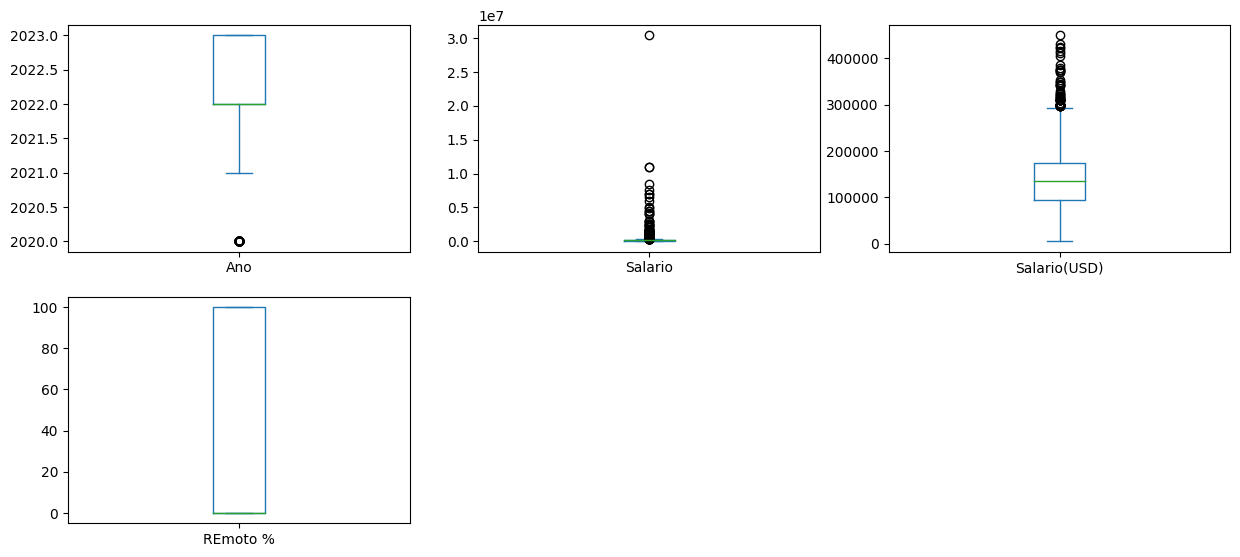

In [94]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### **3.3. Visualizações Multimodais**

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A covariância representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:

Próximo de -1 : há uma correlação negativa entre as variáveis,
Próximo de +1: há uma correlação positiva entre as variáveis.
0: não há correlação entre as variáveis.
OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.

Falamos anteriormente da importância da correlação entre os atributos, e agora iremos visualizar esta informação em formato gráfico. A matriz de correlação exibe graficamente a correlação entre os atributos numéricos do dataset.estão mais distantes um do outro na ordenação.

O código a seguir exibe a matriz de correlação.

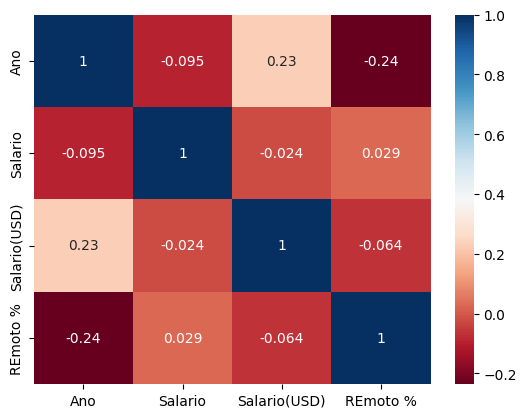

In [95]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

Por sua vez, o gráfico de dispersão (scatter plot) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

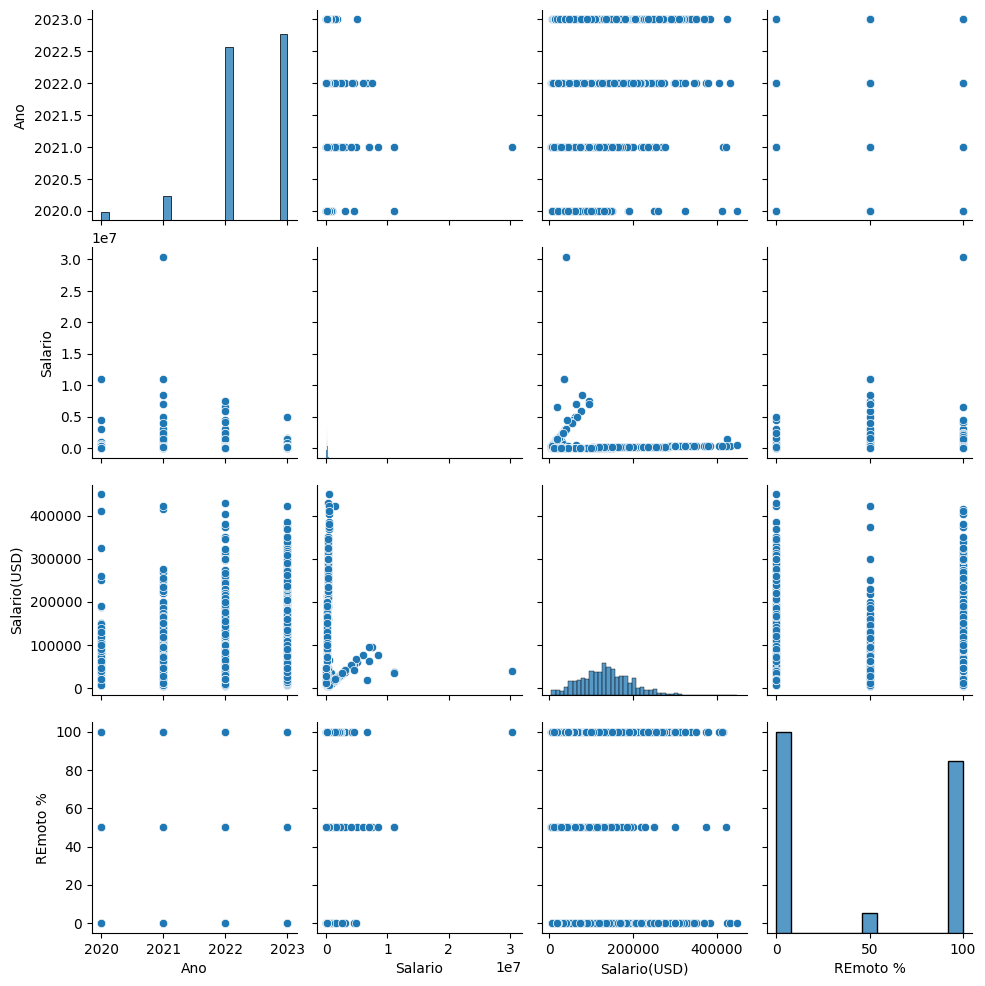

In [96]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(dataset)

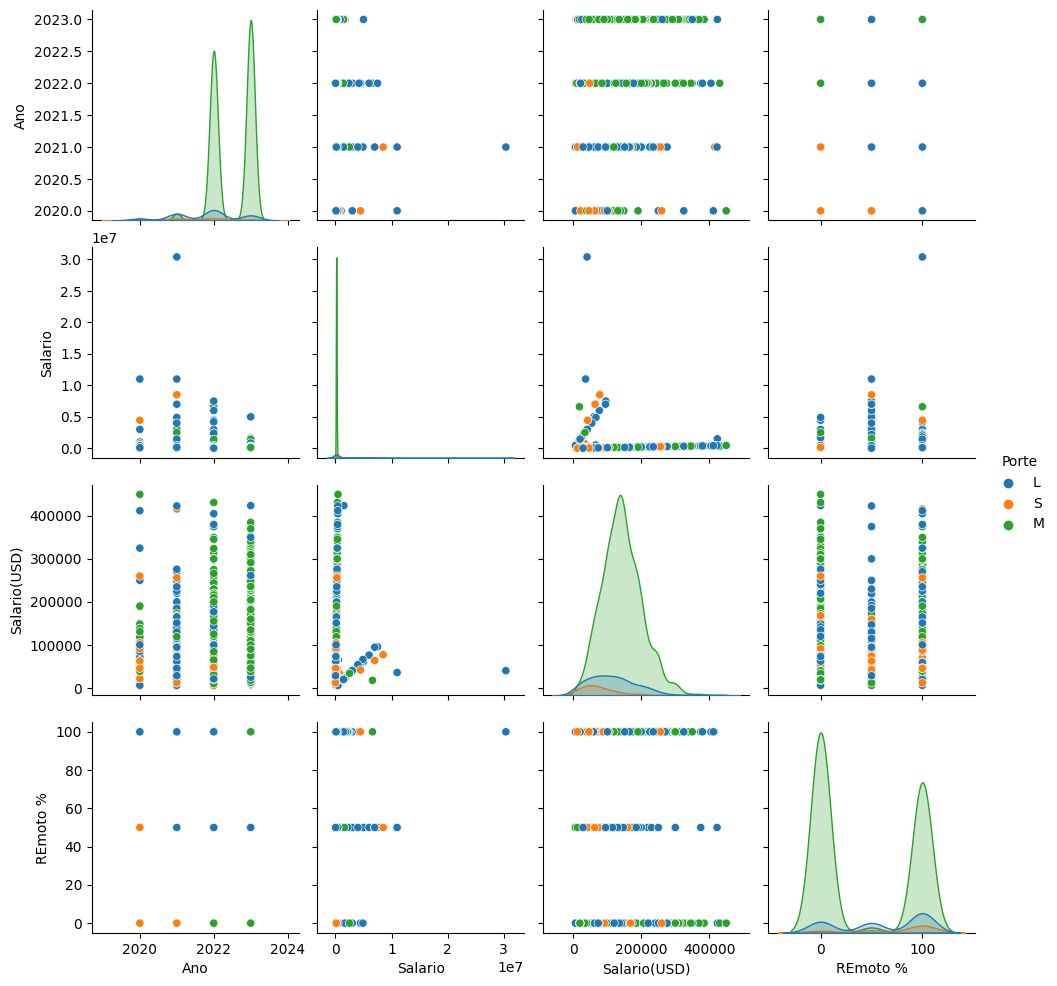

In [100]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(dataset, hue = "Porte", height = 2.5);

## **4. Pré-Processamento de dados**

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### **4.1. Tratamento de Missings e Limpeza**

Sabemos que o datset Diabetes não tem missings aparentes, mas valores "0" que parecem ser missings. Vamos então fazer este tratamento e criar uma nova visão do nosso dataset.

In [101]:
# verificando nulls no dataset
dataset.isnull().sum()

Ano             0
Nivel           0
Tipo_emp        0
Função          0
Salario         0
Moeda           0
Salario(USD)    0
Residencia      0
REmoto %        0
Local           0
Porte           0
dtype: int64

<Axes: >

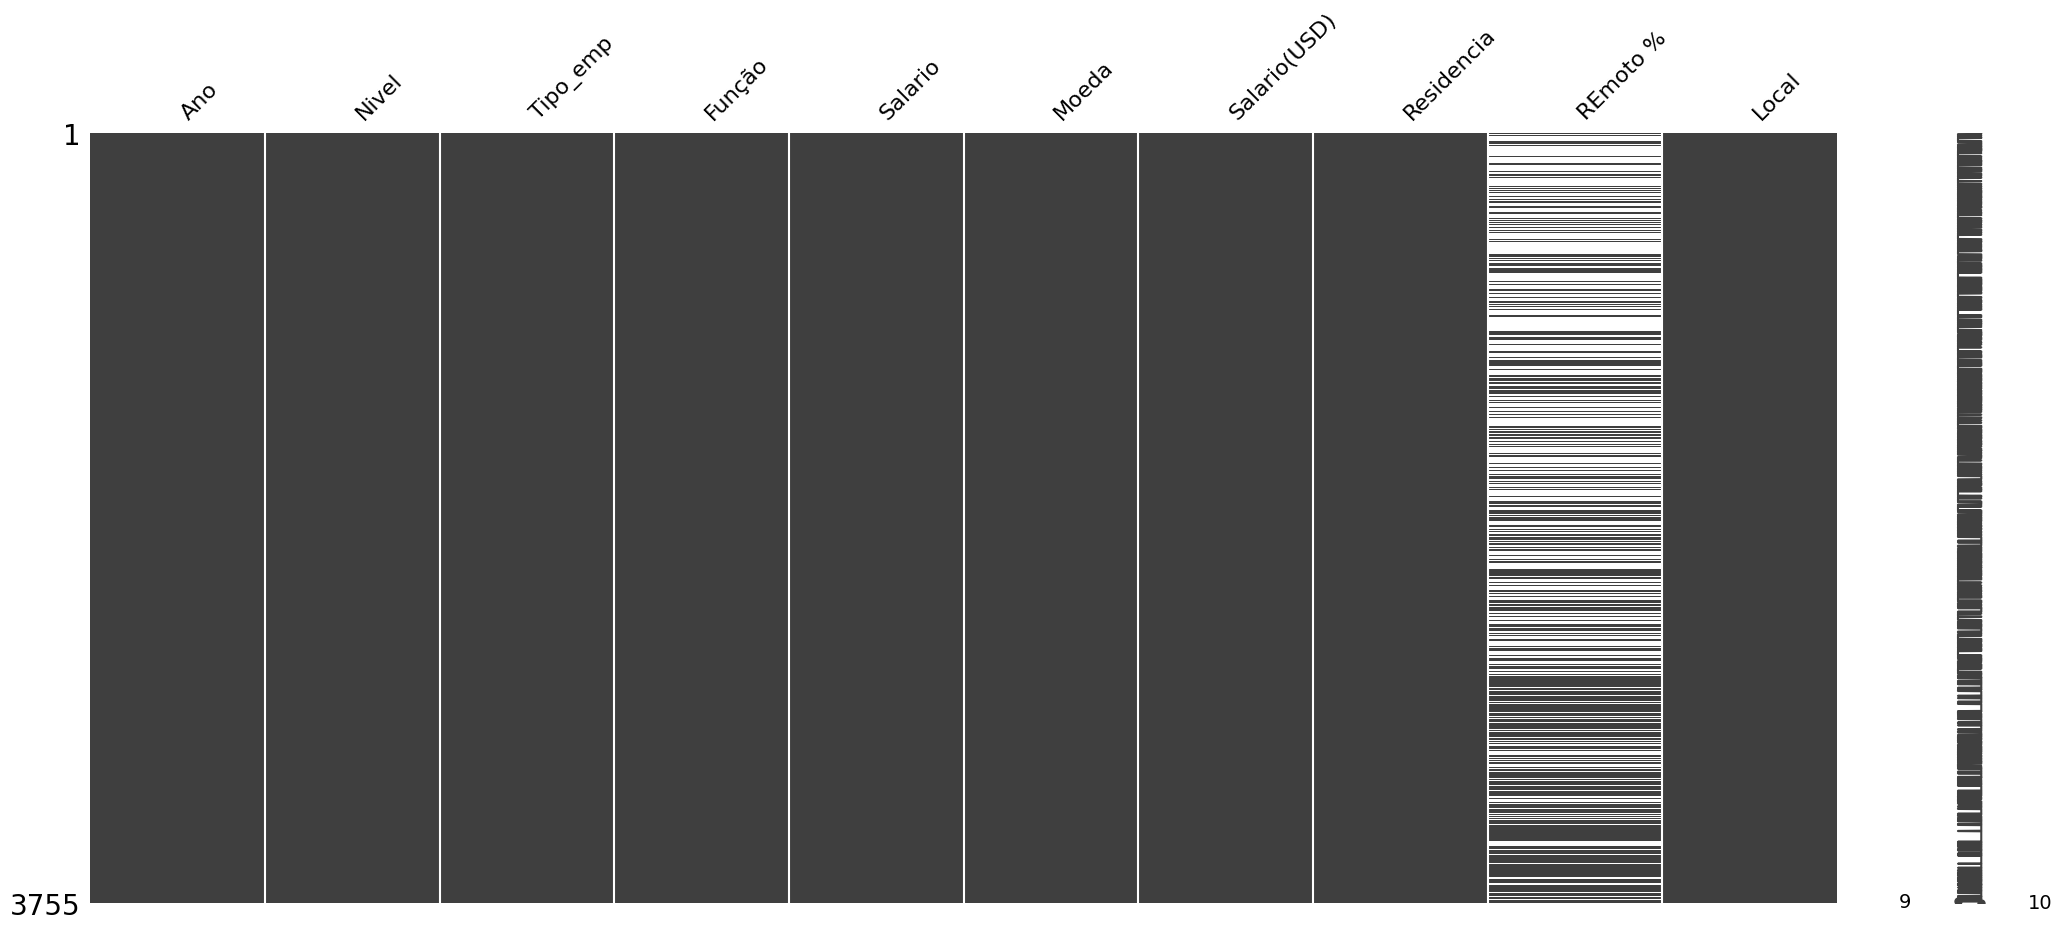

In [102]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = dataset[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

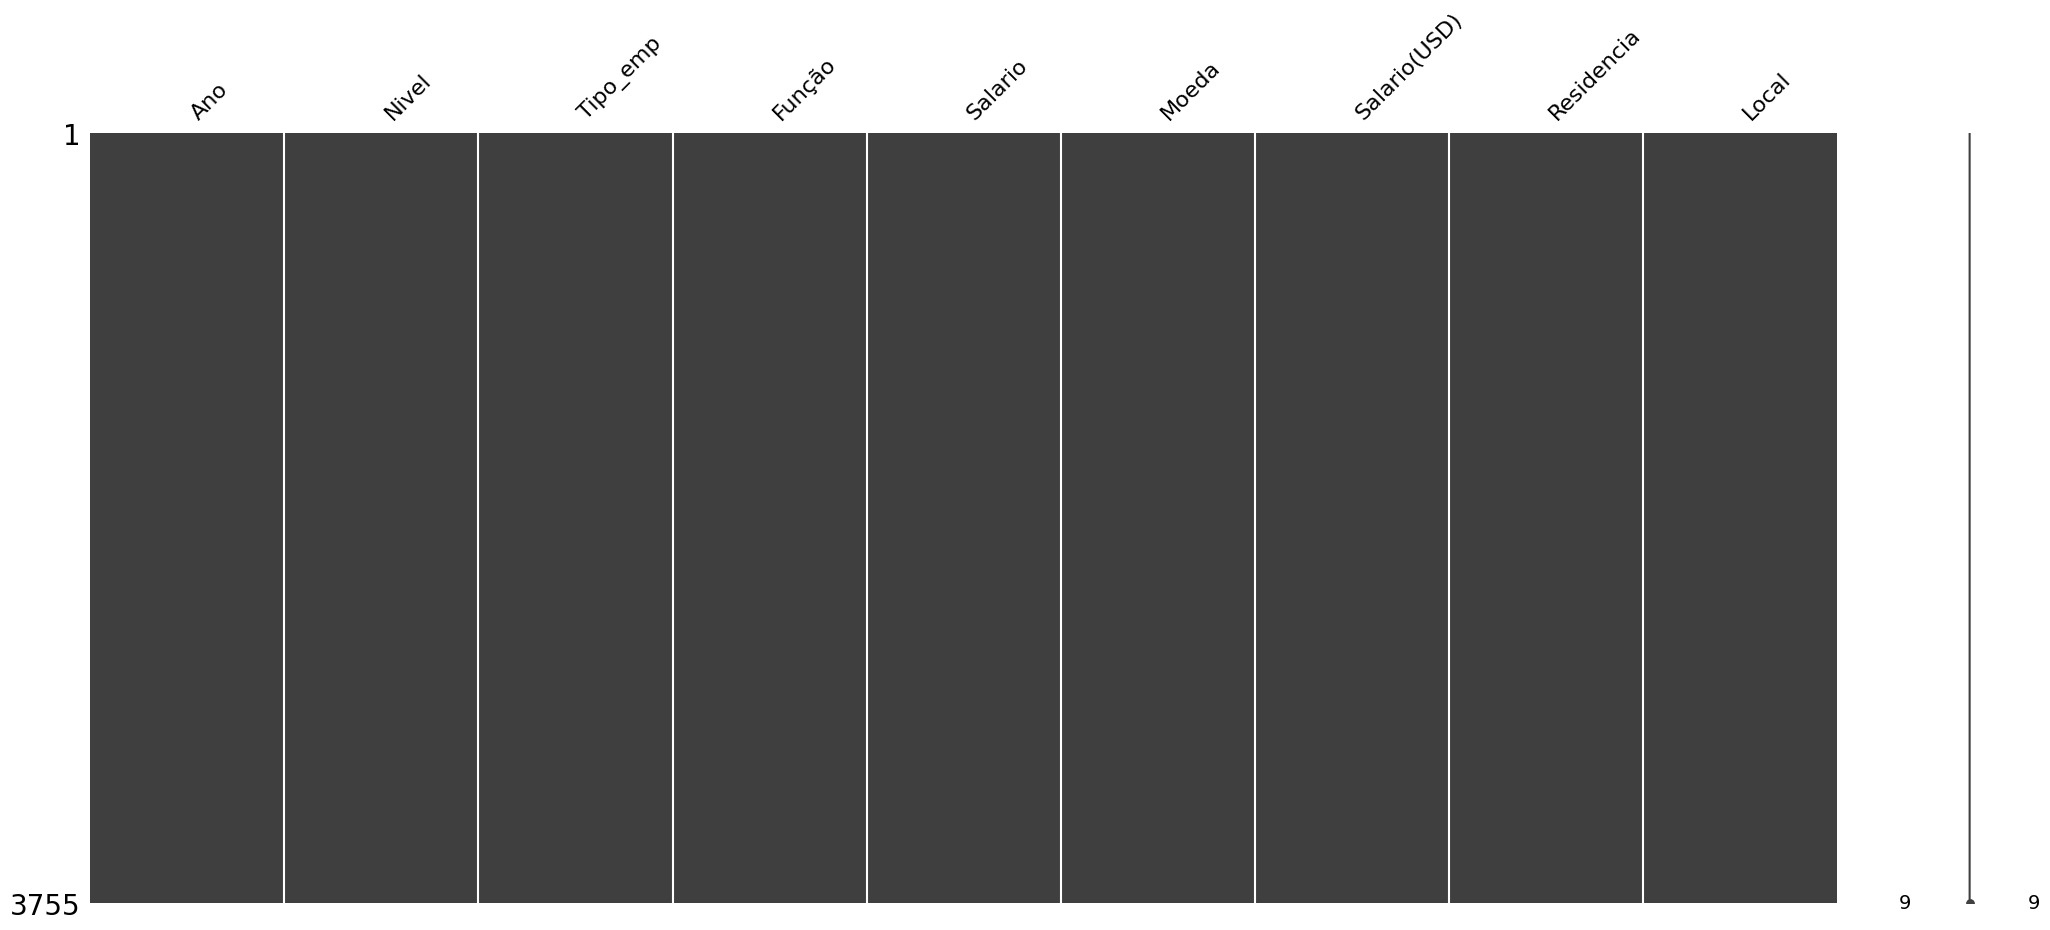

In [106]:
# removendo as colunas 'Remoto %'
atributos.drop(['REmoto %'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [104]:
# substituindo os NaN de 'preg' por 0
atributos['preg'].fillna(0, inplace=True)

# substituindo os NaN de 'plas', 'pres'e 'mass' pela mediana da coluna
atributos['plas'].fillna(atributos['plas'].median(), inplace=True)
atributos['pres'].fillna(atributos['pres'].median(), inplace=True)
atributos['mass'].fillna(atributos['mass'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

KeyError: ignored

In [ ]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'class' no novo dataset
datasetSemMissings['class'] = dataset['class']

# exibindo as primeiras linhas
datasetSemMissings.head()

### **4.2. Separação em conjunto de treino e conjunto de teste**

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

In [ ]:

test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:8]
y = array[:,8]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [ ]:

# Separação em conjuntos de treino e teste (dataset sem missings - 2 colunas a menos!)
array = datasetSemMissings.values
X_sm = array[:,0:6]
y_sm = array[:,6]
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação

## **Conclusão**

Neste MVP foi possível verificar que... [escreva aqui os seu principais achados, pontos de atenção, etc.]